In [35]:
# Identify Voting Trends based on Area variables
#   Area votes compared to age
#   Area votes compared to education level
#   Area votes compared to income level
#   Area votes compared to population


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from config import api_key

# Call Data From Census API
c = Census(api_key, year=2016)

census_data = c.acs5.get(("B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E", "B17001_002E", "B15003_002E",
                         "B15003_017E", "B15003_018E", "B15003_021E", "B15003_022E",
                         "B15003_023E", "B15003_024E", "B15003_025E"), {'for': "county:*"})
# Put data into DataFrame
censusdf = pd.DataFrame(census_data)

# Import 2016 Election Data
#    SOURCE: https://github.com/tonmcg/US_County_Level_Election_Results_08-16
# TODO    Maybe find a way to call this directly from the github source?
Elect2016 = pd.read_csv("C:/Users/sethn/Desktop/2016ElectionProject/2016CountyElectData.csv")

# Preview Census DataFrame
censusdf.head()

,B01002_001E,B01003_001E,B15003_002E,B15003_017E,B15003_018E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B17001_002E,B19013_001E,B19301_001E,county,state
0,37.8,55049.0,456.0,10288.0,2231.0,2603.0,5204.0,3041.0,480.0,243.0,6697.0,53099.0,26168.0,001,01
1,42.3,199510.0,1039.0,32640.0,7514.0,13208.0,27056.0,10063.0,2967.0,1264.0,25551.0,51365.0,28069.0,003,01
2,38.7,26614.0,326.0,5015.0,1407.0,1510.0,1431.0,736.0,124.0,75.0,6235.0,33956.0,17249.0,005,01
3,40.2,22572.0,237.0,5204.0,1382.0,911.0,971.0,763.0,56.0,100.0,3390.0,39776.0,18988.0,007,01
4,40.8,57704.0,705.0,10869.0,2134.0,4567.0,3522.0,1261.0,239.0,129.0,9441.0,46212.0,21033.0,009,01


In [36]:
# Rename column headers to clearer names
censusdf = censusdf.rename(columns={"B01002_001E": "Median Age",
                                   "B01003_001E": "Population",
                                   "B15003_002E": "No Education",
                                   "B15003_017E": "High School",
                                   "B15003_018E": "GED",
                                   "B15003_021E": "Associates",
                                   "B15003_022E": "Bachelors",
                                   "B15003_023E": "Masters",
                                   "B15003_024E": "Professional Degree",
                                   "B15003_025E": "Doctorate"})

# combine state and county codes to create fips code
censusdf["fips"] = censusdf["state"] + censusdf["county"]

# Preview DataFrame
censusdf.head()

,Median Age,Population,No Education,High School,GED,Associates,Bachelors,Masters,Professional Degree,Doctorate,B17001_002E,B19013_001E,B19301_001E,county,state,fips
0,37.8,55049.0,456.0,10288.0,2231.0,2603.0,5204.0,3041.0,480.0,243.0,6697.0,53099.0,26168.0,001,01,01001
1,42.3,199510.0,1039.0,32640.0,7514.0,13208.0,27056.0,10063.0,2967.0,1264.0,25551.0,51365.0,28069.0,003,01,01003
2,38.7,26614.0,326.0,5015.0,1407.0,1510.0,1431.0,736.0,124.0,75.0,6235.0,33956.0,17249.0,005,01,01005
3,40.2,22572.0,237.0,5204.0,1382.0,911.0,971.0,763.0,56.0,100.0,3390.0,39776.0,18988.0,007,01,01007
4,40.8,57704.0,705.0,10869.0,2134.0,4567.0,3522.0,1261.0,239.0,129.0,9441.0,46212.0,21033.0,009,01,01009


In [37]:
# Preview Election Dataframe
Elect2016.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [38]:
# fips needs to be 5 digits
# CSV source has it stored as 4 where there should be a 0 as the first digit
# Convert the combined_fips column to string
# If the length of the fips code is not 5 add a 0 as the first digit
#    Otherwise put the original code

Elect2016["combined_fips"] = Elect2016["combined_fips"].apply(str)

def fips(x):
    if len(x) < 5:
        return "0" + x
    else:
        return x

Elect2016["complete_fips"] = Elect2016["combined_fips"].apply(fips)

# preview DataFrame
Elect2016.head()


# TODO    The Alaska Voter Data seems skewed.
#         Identify reasoning and fix it, or remove it from analysis and note why

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips,complete_fips
0,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013,02013
1,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016,02016
2,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020,02020
3,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050,02050
4,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060,02060


In [43]:
# Merge the DataFrames on fips code

ElectionDemos = censusdf.merge(Elect2016, left_on="fips", right_on="complete_fips", how="inner")

ElectionDemos.head()

,Median Age,Population,No Education,High School,GED,Associates,Bachelors,Masters,Professional Degree,Doctorate,...,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips,complete_fips
0,37.8,55049.0,456.0,10288.0,2231.0,2603.0,5204.0,3041.0,480.0,243.0,...,18110,24661,0.239569,0.734358,"12,202",49.48%,AL,Autauga County,1001,01001
1,42.3,199510.0,1039.0,32640.0,7514.0,13208.0,27056.0,10063.0,2967.0,1264.0,...,72780,94090,0.195653,0.773515,"54,371",57.79%,AL,Baldwin County,1003,01003
2,38.7,26614.0,326.0,5015.0,1407.0,1510.0,1431.0,736.0,124.0,75.0,...,5431,10390,0.466603,0.522714,583,5.61%,AL,Barbour County,1005,01005
3,40.2,22572.0,237.0,5204.0,1382.0,911.0,971.0,763.0,56.0,100.0,...,6733,8748,0.214220,0.769662,"4,859",55.54%,AL,Bibb County,1007,01007
4,40.8,57704.0,705.0,10869.0,2134.0,4567.0,3522.0,1261.0,239.0,129.0,...,22808,25384,0.084699,0.898519,"20,658",81.38%,AL,Blount County,1009,01009


In [44]:
ElectionDemos.dtypes

Median Age             float64
Population             float64
No Education           float64
High School            float64
GED                    float64
Associates             float64
Bachelors              float64
Masters                float64
Professional Degree    float64
Doctorate              float64
B17001_002E            float64
B19013_001E            float64
B19301_001E            float64
county                  object
state                   object
fips                    object
votes_dem                int64
votes_gop                int64
total_votes              int64
per_dem                float64
per_gop                float64
diff                    object
per_point_diff          object
state_abbr              object
county_name             object
combined_fips           object
complete_fips           object
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

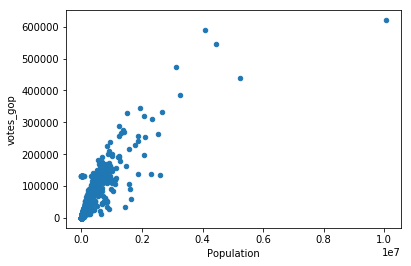

In [45]:
ElectionDemos.plot(kind="scatter", x="Population", y="votes_gop")
plt.show

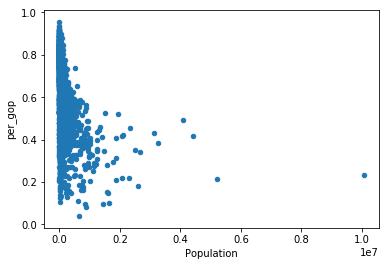

In [47]:
ElectionDemos.plot(kind="scatter", x="Population", y="per_gop")

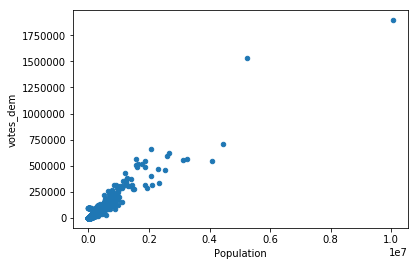

In [48]:
ElectionDemos.plot(kind="scatter", x="Population", y="votes_dem")

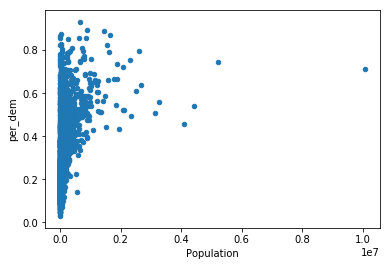

In [49]:
ElectionDemos.plot(kind="scatter", x="Population", y="per_dem")

<function matplotlib.pyplot.show(*args, **kw)>

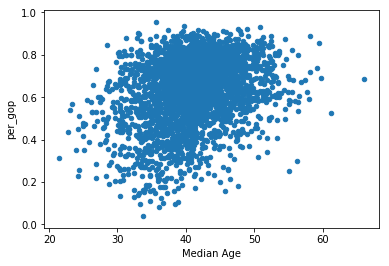

In [57]:
ElectionDemos.plot(kind="scatter", x="Median Age", y="per_gop")
plt.show

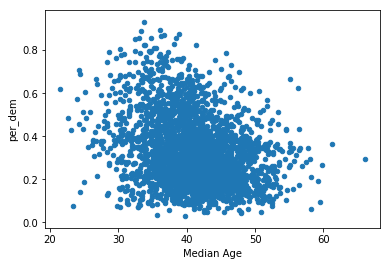

In [56]:
ElectionDemos.plot(kind="scatter", x="Median Age", y="per_dem")